Create some fake data to do some experiments on the runtime complexity of your decision tree algorithm. Create a dataset with N samples and M binary features. Vary M and N to plot the time taken for: 1) learning the tree, 2) predicting for test data. How do these results compare with theoretical time complexity for decision tree creation and prediction. You should do the comparison for all the four cases of decision trees. [1 marks]


Case of Discrete input and Discrete output

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from typing import Union
import pandas as pd
import numpy as np
import math


def accuracy(y_hat: pd.Series, y: pd.Series) -> float:
    """
    Function to calculate the accuracy between predicted and actual values.

    Parameters:
    y_hat (pd.Series): Predicted labels
    y (pd.Series): Actual labels

    Returns:
    float: The accuracy score
    """
    # Check if the lengths of y_hat and y are equal
    if y_hat.size != y.size:
        raise ValueError(
            "The predicted and actual series must be of the same length.")

    # Calculate the accuracy
    correct_predictions = np.sum(y_hat == y)
    accuracy_score = correct_predictions / y.size

    return accuracy_score


def precision(y_hat: pd.Series, y: pd.Series, cls: Union[int, str]) -> float:
    """
    Function to calculate the precision
    Precision = Total correct predictions out of all positive predictions
    """
    if (isinstance(y_hat, pd.Series)):
        y_hat = y_hat.tolist()
    if (isinstance(y, pd.Series)):
        y = y.tolist()

    chosen_class = cls
    total_samples = len(y)

    pred_class_total = y_hat.count(chosen_class)

    correct_pred_count = 0
    for i in range(total_samples):
        if (y_hat[i] == chosen_class):
            if (y_hat[i] == y[i]):
                correct_pred_count += 1
    if (pred_class_total == 0):
        return None
    ans = (correct_pred_count/pred_class_total)*100
    return ans


def recall(y_hat: pd.Series, y: pd.Series, cls: Union[int, str]) -> float:
    """
    Function to calculate the recall.

    Parameters:
    y_hat (pd.Series): Predicted labels
    y (pd.Series): Actual labels
    cls (Union[int, str]): The class for which recall is to be calculated

    Returns:
    float: Recall score as a percentage
    """
    if isinstance(y_hat, pd.Series):
        y_hat = y_hat.tolist()
    if isinstance(y, pd.Series):
        y = y.tolist()

    total_samples_chosen = y.count(cls)

    if total_samples_chosen == 0:
        return 0.0  # or return some appropriate value or message for no instances of the class

    recall_count = 0

    for i in range(len(y)):
        if y[i] == cls:
            if y_hat[i] == y[i]:
                recall_count += 1

    ans = (recall_count / total_samples_chosen) * 100
    return ans


def rmse(y_hat: pd.Series, y: pd.Series) -> float:
    """
    Function to calculate the root-mean-squared-error(rmse)
    """
    if isinstance(y_hat, pd.Series):
        y_hat = y_hat.tolist()
    if isinstance(y, pd.Series):
        y = y.tolist()
    diff = [0]*len(y)
    for i in range(len(diff)):
        diff[i] = (y_hat[i]-y[i])**2
    ans = sum(diff)/len(y)
    ans = math.sqrt(ans)
    return ans


def mae(y_hat: pd.Series, y: pd.Series) -> float:
    """
    Function to calculate the mean-absolute-error(mae)
    """
    if isinstance(y_hat, pd.Series):
        y_hat = y_hat.tolist()
    if isinstance(y, pd.Series):
        y = y.tolist()
    diff = [0]*len(y)
    for i in range(len(diff)):
        diff[i] = abs(y_hat[i]-y[i])
    return sum(diff)/len(y)

In [3]:
"""
You can add your own functions here according to your decision tree implementation.
There is no restriction on following the below template, these fucntions are here to simply help you.
"""

import math
import pandas as pd


def one_hot_encoding(X: pd.DataFrame) -> pd.DataFrame:
    # this function will accept a dataframe and return a dataframe with one hot encoding
    encoded_df = pd.DataFrame()

    # iterate over all the columns in the dataframe
    for col in X.columns:
        unique_values = sorted(X[col].unique())


        # iterate over all the unique values in the column
        for val in unique_values:
            # create a new column in the encoded dataframe with the name of the column and the unique value
            # and set the value of the column to 1 if the value in the original dataframe is equal to the unique value
            # otherwise set the value to 0
            # print(type(col)) # int or str
            # print(type(val)) # int
            encoded_df[str(col) + "_" + str(val)] = (X[col] == val).astype(int)

    return encoded_df


def check_ifreal(y: pd.Series) -> bool:
    """
    Function to check if the given series has real or discrete values
    """

    pass


def entropy(Y: pd.Series) -> float:
    """
    Function to calculate the entropy
    """
    hash = {}

    # calculate the frequency of each value in the series
    for value in Y:
        if value in hash:
            hash[value] += 1
        else:
            hash[value] = 1

    # calculate the entropy
    # entropy = summation of -p(x) * log2(p(x)) for all x in the series
    entropy = 0
    for value in hash:
        prob = hash[value] / len(Y)
        entropy -= prob * math.log2(prob)

    return entropy


def gini_index(Y: pd.Series) -> float:
    """
    Function to calculate the gini index
    The Gini Index measures how often a randomly chosen element from the set would be incorrectly
    labeled if it was randomly labeled according to the distribution of labels in the set.
    """
    hash = {}

    # calculate the frequency of each value in the series
    for value in Y:
        if value in hash:
            hash[value] += 1
        else:
            hash[value] = 1

    # calculate the gini index
    # gini index = 1 - summation of p(x)^2 for all x in the series
    gini = 1
    for value in hash:
        prob = hash[value] / len(Y)
        gini -= prob ** 2

    return gini


def mean_squared_error(series: pd.Series) -> float:
    mean = series.mean()
    sum = 0
    for x in series:
        sum += (x - mean) ** 2

    return sum / len(series)


# def information_gain(Y: pd.Series, attr: pd.Series, criterion: str) -> float:
#     """
#     Function to calculate the information gain using criterion (entropy, gini index or MSE)
#     attr -> attribute to split upon, it is in the form of a series which has values of the attribute
#     """
#     # calculate the entropy or gini index of the original series
#     if criterion == "entropy":
#         org_criteria_value = entropy(Y)
#     else:
#         org_criteria_value = gini_index(Y)

    # # calculate the weighted entropy or gini index of the attribute
    # weighted_criteria_value = 0

    # # iterate over all the unique values in the attribute
    # print("attributes:", attr)
    # print("unique:", attr.unique())
    # for value in attr.unique():
    #     # calculate the subset of the series where the attribute is equal to the value
    #     # this will give a boolean series
    #     subset_Y = Y[attr == value]
    #     print("subset_Y:", subset_Y)
    #     # calculate the weight of the subset
    #     subset_weight = len(subset_Y) / len(Y)
    #     if criterion == "entropy":
    #         subset_criteria_value = entropy(subset_Y)
    #         print("subset_criteria_value:", subset_criteria_value)
    #     else:
    #         subset_criteria_value = gini_index(subset_Y)

    #     # calculate the weighted entropy or gini index of the attribute
    #     weighted_criteria_value += (subset_weight * subset_criteria_value)
    #     print("weighted_criteria_value:", weighted_criteria_value)

    # print("org_criteria_value:", org_criteria_value)

    # # now we have

    # # calculate the information gain
    # information_gain = org_criteria_value - weighted_criteria_value

    # return information_gain

def information_gain(Y: pd.Series, attr: pd.DataFrame, criterion: str) -> float:
    """
    Function to calculate the information gain using criterion (entropy, gini index)
    attr -> attribute to split upon, it is in the form of a series which has values of the attribute
    """
    # print(type(attr)) # dataframe
    # calculate the entropy or gini index of the original series
    if criterion == "entropy":
        org_criteria_value = entropy(Y) # ye sahi se aa raha hai
        # print("Y: ", Y)
        # print("org_criteria_value: ", org_criteria_value)
    else:
        org_criteria_value = gini_index(Y)

    # calculate the weighted entropy or gini index of the attribute
    weighted_criteria_value = 0

    # Group features by their original feature (before one-hot encoding)
    original_features = {}
    for feature in attr.columns.unique():
        # print("feature: ", feature)
        # Extract the original feature name
        original_feature = feature.split('_')[0]
        if original_feature not in original_features:
            original_features[original_feature] = []
        original_features[original_feature].append(feature)

    # print("original features: ", original_features)
    # print("attr", attr)

    # Iterate through each group of one-hot encoded features
    # print("orignial feature items: ", original_features.items())
    # print(list(original_features.values())) # 2d list
    encoded_features_2d = list(original_features.values())
    encoded_features = [item for sublist in encoded_features_2d for item in sublist]
    # print("encoded_features: ", encoded_features)
    for encoded_feature in encoded_features:
        # Calculate the subset of the series where the attribute is equal to the value
        # Use .any() to check if any of the one-hot encoded features is True
        # print("original feature: ", original_feature)
        # print("encoded features: ", encoded_features)
        indices = attr[attr[encoded_feature] == 1].index
        subset_Y = Y.loc[indices]
        # print("--------------------")
        # print(subset_Y)
        # print("--------------------")

        # Calculate the weight of the subset
        subset_weight = len(subset_Y) / len(Y)
        if criterion == "entropy":
            subset_criteria_value = entropy(subset_Y)
            # print("subset_criteria_value:", subset_criteria_value)
        else:
            subset_criteria_value = gini_index(subset_Y)

        # Calculate the weighted entropy or gini index of the attribute
        weighted_criteria_value += (subset_weight * subset_criteria_value)

    # Calculate the information gain
    information_gain = org_criteria_value - weighted_criteria_value

    # print("===============")
    # print("information_gain: ", information_gain)
    # print("===============")

    return information_gain



def most_reduction_in_mse(X: pd.DataFrame, y: pd.Series, feature: pd.Series) -> float:
    # this function will find the best split for real valued output
    best_value = None
    best_score = -float('inf')

    # print("X: ", X)
    # print("y: ", y)
    # print("feature: ", feature)
    # print(X[feature].sort_values().unique())

    # Sort the feature values and get unique values
    sorted_feature = X[feature].sort_values().unique()

    # Iterate over possible split points between consecutive values
    for i in range(1, len(sorted_feature)):
        # Calculate the split value as the average of consecutive values
        split_value = (sorted_feature[i] + sorted_feature[i - 1]) / 2

        # Split the data based on the split value
        left = y[X[feature] <= split_value]
        right = y[X[feature] > split_value]

        # Calculate the Mean Squared Error for the split
        left_mse = mean_squared_error(left)
        right_mse = mean_squared_error(right)
        weighted_mse = (len(left) / len(y) * left_mse) + \
            (len(right) / len(y) * right_mse)
        reduction_in_mse = mean_squared_error(y) - weighted_mse

        # Update the best split value and score if the reduction in MSE is higher
        if reduction_in_mse > best_score:
            best_value = split_value
            best_score = reduction_in_mse

    return best_value, best_score


def opt_split_discrete(X: pd.DataFrame, y: pd.Series, criterion, features: pd.Series):
    best_attribute = None
    best_score = -float('inf')

    # # iterate over all the features
    # for feature in features:
    #     # get the unique values of the feature
    #     unique_values = X[feature].unique()

    #     # iterate over all the unique values
    #     for value in unique_values:
    #         # calculate the information gain of the feature
    #         info_gain = information_gain(y, X[feature] == value, criterion)

    #         # update the best attribute and value if the information gain is higher
    #         if info_gain > best_score:
    #             best_attribute = feature
    #             best_value = value
    #             best_score = info_gain

    # return best_attribute, best_value

    # Group features by their original feature (before one-hot encoding)
    original_features = {}
    for feature in features:
        # Extract the original feature name
        try:
            original_feature = int(feature.split('_')[0])
        except ValueError:
            original_feature = feature.split('_')[0]
        if original_feature not in original_features:
            original_features[original_feature] = []
        original_features[original_feature].append(feature)

    # print("Original Features: ", original_features)

    # Iterate through each group of one-hot encoded features
    for original_feature, encoded_features in original_features.items():
        # print("passing this into information gain:", pd.Series(encoded_features))
        # print(encoded_features)
        # print(type(encoded_features))
        # print(X[encoded_features])
        # print(X[encoded_features].columns)
        # Calculate the information gain for the group of features
        info_gain = information_gain(
            y, X[encoded_features], criterion)
        # print("Information Gain: ", info_gain, "for feature: ", original_feature)

        # Update the best attribute and value if the information gain is higher
        if info_gain > best_score:
            best_attribute = original_feature  # Store the original feature name
            best_score = info_gain

    return best_attribute


def opt_split_real(X: pd.DataFrame, y: pd.Series, features: pd.Series):
    # this function will find the best split for real valued output

    best_attribute = None
    best_value = None
    best_score = -float('inf')

    # iterate over all the features
    # print(features)
    for feature in features:
        # find the best split for the feature
        value, score = most_reduction_in_mse(X, y, feature)

        # update the best attribute and value if the reduction in MSE is higher
        if score > best_score:
            best_attribute = feature
            best_value = value
            best_score = score

    return best_attribute, best_value


def information_gain_without_one_hot_encoding(Y: pd.Series, attr: pd.Series, criterion: str, split_value) -> float:
    """
    Function to calculate the information gain using criterion (entropy, gini index)
    attr -> attribute to split upon, it is in the form of a series which has values of the attribute
    """
    # calculate the entropy or gini index of the original series
    if criterion == "entropy":
        org_criteria_value = entropy(Y)
    else:
        org_criteria_value = gini_index(Y)

    # calculate the weighted entropy or gini index of the attribute
    weighted_criteria_value = 0

    left = Y[attr <= split_value]
    right = Y[attr > split_value]

    if criterion == "entropy":
            weighted_criteria_value = (len(left) / len(Y)) * entropy(left) + (len(right) / len(Y)) * entropy(right)
    else:
        weighted_criteria_value = (len(left) / len(Y)) * gini_index(left) + (len(right) / len(Y)) * gini_index(right)

    information_gain = org_criteria_value - weighted_criteria_value

    return information_gain


def opt_split_rido(X: pd.DataFrame, y: pd.Series, features: pd.Series, criterion: str):
    # we need to find the best split for real input and discrete output
    # iterate over all the features
    # for each feature, sort the values and find the best split
    # get the information gain for each feature using entropy or gini index
    # return the feature with the highest information gain
    best_attribute = None
    best_score = -float('inf')
    best_split = None

    for feature in features:
        # first sort the values of the feature
        sorted_values = X[feature].sort_values().unique()

        # iterate over all the possible split points
        for i in range(1, len(sorted_values)):
            split = (sorted_values[i] + sorted_values[i - 1]) / 2

            # calculate the information gain
            info_gain = information_gain_without_one_hot_encoding(
                y, X[feature], criterion, split)

            # update the best attribute and score if the information gain is higher
            if info_gain > best_score:
                best_attribute = feature
                best_score = info_gain
                best_split = split

    return best_attribute, best_split


def split_data(X: pd.DataFrame, y: pd.Series, attribute, value):
    """
    Funtion to split the data according to an attribute.
    If needed you can split this function into 2, one for discrete and one for real valued features.
    You can also change the parameters of this function according to your implementation.

    attribute: attribute/feature to split upon
    value: value of that attribute to split upon

    return: splitted data(Input and output)
    """

    # Split the data based on a particular value of a particular attribute. You may use masking as a tool to split the data.

    pass

In [4]:
"""
The current code given is for the Assignment 1.
You will be expected to use this to make trees for:
> discrete input, discrete output
> real input, real output
> real input, discrete output
> discrete input, real output
"""
from dataclasses import dataclass
from typing import Literal

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


np.random.seed(42)

@dataclass
class Node:
    def __init__(self):
        self.left = None
        self.right = None
        self.prediction = None
        self.split_value = None
        self.split_attribute = None
        self.children = {} # the decision tree will be stored here


@dataclass
class DecisionTree:
    """
    criterion -> The criterion to be used for splitting: information_gain or gini_index
    max_depth -> The maximum depth the tree can grow to
    input_type -> The type of input data: real or discrete
    output_type -> The type of output data: real or discrete
    """
    criterion: Literal["information_gain", "gini_index"]
    max_depth: int

    def __init__(self, criterion, max_depth=5):
        self.criterion = criterion
        self.max_depth = max_depth
        self.input_type = None
        self.output_type = None
        self.children = {}  # for the root node

    def fit(self, X: pd.DataFrame, y: pd.Series) -> None:
        """
        Function to train and construct the decision tree
        X -> pd.DataFrame with features as columns and samples as rows
        y -> pd.Series with labels
        """

        # determine the types of input and output data
        dtype_of_each_feature = []
        for i in list(X.columns):
            dtype_of_each_feature.append(X[i].dtype.name)

        self.input_type = dtype_of_each_feature[0]
        # self.input_type = X[0].dtype.name
        self.output_type = y.dtype.name

        # print(self.input_type)
        # print(self.output_type)

        # if the input is discrete, the datatype is "category"
        # if the input is real, the datatype is "float64"
        category = "category"

        # one hot encode if the input is discrete
        if self.input_type == category:
            # print("One hot encoding the features!")
            X = one_hot_encoding(X)
            attributes = pd.Series(X.columns)
            # print("attr:", attributes)

        attributes = pd.Series(X.columns)

        if self.input_type == category and self.output_type == category:
            # print("HERE")
            self.children = self.fit_discrete_discrete(
                X, y, attributes, 0)
        elif self.input_type == category and self.output_type == "float64":
            self.children = self.fit_discrete_real(X, y, attributes, 0)
        elif self.input_type == "float64" and self.output_type == category:
            # print("HI")
            self.children = self.fit_real_discrete(X, y, attributes, 0)
        elif self.input_type == "float64" and self.output_type == "float64":
            self.children = self.fit_real_real(X, y, attributes, 0)


    def fit_discrete_discrete(self, X: pd.DataFrame, y: pd.Series, attributes: pd.Series, depth: int) -> None:
        """
        Function to train and construct the decision tree for discrete input and discrete output
        X -> pd.DataFrame with features as columns and samples as rows
        y -> pd.Series with labels
        """

        # condition 1: if the depth of the tree is greater than the max_depth, then return the most common class in the current node
        if (depth >= self.max_depth):
            return y.mode().iloc[0]

        # condition 2: if all the samples in the current node belong to the same class, then return that class
        if len(y.unique()) == 1:
            return y.iloc[0]

        # condition 3: if there are no more attributes to split upon, then return the most common class in the current node
        if len(attributes) == 0:
            return y.mode().iloc[0]

        # condition 4: if none of the above conditions are satisfied, then find the best attribute to split upon
        best_attribute = opt_split_discrete(X, y,  self.criterion, attributes)

        # create a new node
        node = Node()
        node.split_attribute = best_attribute

        # remove the best attribute from the list of attributes

        # Split the data based on the best attribute (handling one-hot encoded values)
        # Get the one-hot encoded columns for the best_attribute
        encoded_features = [
            col for col in X.columns if col.startswith(str(best_attribute) + '_')]
        # print("encoded features:", encoded_features)
        # attributes = attributes.drop(encoded_features)
        # print(type(attributes))
        for feature in encoded_features:
            # print(type(feature))
            attributes = attributes[attributes != feature]

        # print("attributes:", attributes)
        # print("best attribute:", best_attribute)

        # Iterate over the possible values of the best attribute
        for value in range(len(encoded_features)):
            # Use 1 because it's a one-hot encoding
            X_subset = X[X[encoded_features[value]] == 1]
            y_subset = y[X_subset.index]
            if len(X_subset) == 0:  # just in case
                node.children[value] = y.mode().iloc[0]
                node.prediction = y.mode().iloc[0]
            else:
                node.split_value = value
                # recursively call the function to construct the tree
                node.children[value] = self.fit_discrete_discrete(
                    X_subset, y_subset, attributes, depth + 1)

        return node

    def fit_discrete_real(self, X: pd.DataFrame, y: pd.Series, attributes: pd.Series, depth: int) -> None:
        """
        Function to train and construct the decision tree for discrete input and real output
        X -> pd.DataFrame with features as columns and samples as rows
        y -> pd.Series with labels
        """

        # condition 1: if the depth of the tree is greater than the max_depth, then return the mean of the current node
        if (depth >= self.max_depth):
            return y.mean()

        # condition 2: if there are no more attributes to split upon, then return the mean of the current node
        if len(attributes) == 0:
            return y.mean()

        # condition 3: if all the samples belong to the same value which is unlikely but still, return that value
        if len(y.unique()) == 1:
            return y.iloc[0]

        # condition 4: if none of the above conditions are satisfied, then find the best attribute to split upon
        best_attribute = opt_split_discrete(X, y,  self.criterion, attributes)

        # create a new node
        node = Node()
        node.split_attribute = best_attribute

        encoded_features = [
            col for col in X.columns if col.startswith(str(best_attribute) + '_')]

        # remove the best attribute from the list of attributes
        # attributes = attributes.drop(best_attribute)
        for feature in encoded_features:
            # print(type(feature))
            attributes = attributes[attributes != feature]

        # split the data based on the best attribute
        for value in range(len(encoded_features)):
            X_subset = X[X[encoded_features[value]] == 1]
            y_subset = y[X_subset.index]
            if len(X_subset) == 0: # just in case
                node.children[value] = y.mean()
                node.prediction = y.mean()
            else:
                node.split_value = value
                node.children[value] = self.fit_discrete_real(X_subset, y_subset, attributes, depth + 1)

        return node


    def fit_real_discrete(self, X: pd.DataFrame, y: pd.Series, attributes: pd.Series, depth: int) -> None:
        """
        Function to train and construct the decision tree for real input and discrete output
        X -> pd.DataFrame with features as columns and samples as rows
        y -> pd.Series with labels
        """

        # condition 1: if the depth of the tree is greater than the max_depth, then return the most common class in the current node
        if (depth >= self.max_depth):
            return y.mode().iloc[0]

        # condition 2: if all the samples in the current node belong to the same class, then return that class
        if len(y.unique()) == 1:
            return y.iloc[0]

        # condition 3: if there are no more attributes to split upon, then return the most common class in the current node
        if len(attributes) == 0:
            return y.mode().iloc[0]

        # condition 4: if none of the above conditions are satisfied, then find the best attribute to split upon
        # print("attributes AJSDLASLD:", type(attributes))
        best_attribute, best_value = opt_split_rido(X, y, attributes, self.criterion)

        # create a new node
        node = Node()
        node.split_attribute = best_attribute
        node.split_value = best_value

        # remove the best attribute from the list of attributes
        attributes = attributes.drop(best_attribute)

        # split the data based on the best attribute
        X_left = X[X[best_attribute] <= best_value]
        y_left = y[X_left.index]
        X_right = X[X[best_attribute] > best_value]
        y_right = y[X_right.index]

        # recursively call the function to construct the tree
        node.left = self.fit_real_discrete(X_left, y_left, attributes, depth + 1)
        node.right = self.fit_real_discrete(X_right, y_right, attributes, depth + 1)

        return node




    def fit_real_real(self, X: pd.DataFrame, y: pd.Series, attributes: pd.Series, depth: int) -> None:
        """
        Function to train and construct the decision tree for real input and real output
        X -> pd.DataFrame with features as columns and samples as rows
        y -> pd.Series with labels
        """

        # condition 1: if the depth of the tree is greater than the max_depth, then return the mean of the current node
        if (depth >= self.max_depth):
            return y.mean()

        # condition 2: if there are no more attributes to split upon, then return the mean of the current node
        if len(attributes) == 0:
            return y.mean()

        # condition 3: if all the samples belong to the same value which is unlikely but still, return that value
        if len(y.unique()) == 1:
            return y.iloc[0]

        # condition 4: if none of the above conditions are satisfied, then find the best attribute to split upon
        best_attribute, best_value = opt_split_real(X, y, attributes)

        # create a new node
        node = Node()
        node.split_attribute = best_attribute
        node.split_value = best_value

        # remove the best attribute from the list of attributes
        attributes = attributes.drop(best_attribute)

        # split the data based on the best attribute
        X_left = X[X[best_attribute] <= best_value]
        y_left = y[X_left.index]
        X_right = X[X[best_attribute] > best_value]
        y_right = y[X_right.index]

        # recursively call the function to construct the tree
        node.left = self.fit_real_real(X_left, y_left, attributes, depth + 1)
        node.right = self.fit_real_real(X_right, y_right, attributes, depth + 1)

        return node

    def predict(self, X: pd.DataFrame) -> pd.Series:
        """
        Function to run the decision tree on test inputs
        """
        predictions = []
        for i in range(X.shape[0]):
            # print(self.children)
            current_node = self.children  # start from the root node
            # keep traversing until we reach a leaf node
            while isinstance(current_node, Node):
                split_attribute = current_node.split_attribute
                split_value = current_node.split_value

                if self.input_type == 'category':  # for discrete input
                    # get the value of the split attribute for the current sample
                    value = X[split_attribute].iloc[i]
                    if value in current_node.children:
                        # move to the corresponding child node
                        current_node = current_node.children[value]
                    else:
                        # if the value is not present in the tree, return the majority class
                        current_node = current_node.prediction
                        break
                else:  # for real input
                    value = X[split_attribute].iloc[i]
                    if value <= split_value:
                        current_node = current_node.left  # move to the left child
                    else:
                        current_node = current_node.right  # move to the right child
            # append the prediction for the current sample
            predictions.append(current_node)

        return pd.Series(predictions)

    def plot(self) -> None:
        """
        Function to plot the tree

        Output Example:
        ?(X1 > 4)
            Y: ?(X2 > 7)
                Y: Class A
                N: Class B
            N: Class C
        Where Y => Yes and N => No
        """
        pass

In [5]:
import numpy as np
import time
# from sklearn.tree import DecisionTreeClassifier

N = 1000
M = 5

X = pd.DataFrame(np.random.randint(0, 2, (N, M)))
y = pd.Series(np.random.randint(0, 2, N))

time_accross_diffno_features = []
time_accross_diffno_features_2 = []


time_single_col_train = []
time_single_col_test = []
#testing for single value
for value in X.columns:
    X_final = X[[value]]

    # Step 2: Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

    #here we train the data
    start_time = time.time()

    clf = DecisionTree(criterion="information_gain")

    #Resetting the old indices, as they get duplicated while concatenation, and indices are used in .fit, and hence are needed to be rest before training
    X_train = X_train.reset_index(drop=True)
    y_train = pd.Series(y_train)
    y_train = y_train.reset_index(drop=True)
    X_test = X_test.reset_index(drop=True)
    y_test = pd.Series(y_test)
    y_test = y_test.reset_index(drop=True)

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    end_time = time.time()

    time_single_col_train.append(end_time-start_time)

    start_time = time.time()

    y_pred = clf.predict(X_test)

    end_time = time.time()

    time_single_col_test.append(end_time-start_time)

print(f"Time requried to train when only one feature {np.average(time_single_col_train)}")
print(f"Time requried to test when only one feature {np.average(time_single_col_test)}")

time_accross_diffno_features.append(np.average(time_single_col_train))
time_accross_diffno_features_2.append(np.average(time_single_col_test))

Time requried to train when only one feature 0.00044693946838378904
Time requried to test when only one feature 7.982254028320313e-05


In [6]:
time_second_col_train = []
time_second_col_test = []
# Time for training on two features
for i in range(len(X.columns)):
    for j in range(i + 1, len(X.columns)):
        X_final = X[[X.columns[i], X.columns[j]]]
        X_train, X_test, y_train, y_test = train_test_split(
            X_final, y, test_size=0.3, random_state=42)

        X_train = X_train.reset_index(drop=True)
        y_train = pd.Series(y_train).reset_index(drop = True)

        # here we train the data
        start_time = time.time()
        clf = DecisionTree(criterion="information_gain", max_depth=5)
        clf.fit(X_train, y_train)
        end_time = time.time()
        time_single_col_train.append(end_time-start_time)
        start_time = time.time()
        y_pred = clf.predict(X_test)
        end_time = time.time()
        time_single_col_test.append(end_time-start_time)

print(f"Time requried to train when two features {
      np.average(time_single_col_train)}")
print(f"Time requried to test when two features {
      np.average(time_single_col_test)}")

time_accross_diffno_features.append(np.average(time_single_col_train))
time_accross_diffno_features_2.append(np.average(time_single_col_test))

Time requried to train when two features 0.00021050771077473957
Time requried to test when two features 8.35418701171875e-05


In [102]:
time_three_col_train = []
time_three_col_test = []
for i in range(len(X.columns)):
    for j in range(i + 1, len(X.columns)):
        for k in range(j + 1, len(X.columns)):
            X_final = X[[X.columns[i], X.columns[j], X.columns[k]]]
            X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

            X_train = X_train.reset_index(drop=True)
            y_train = pd.Series(y_train).reset_index(drop = True)

            #here we train the data
            start_time = time.time()
            clf = DecisionTree(max_depth=5, criterion="information_gain")
            clf.fit(X_train, y_train)
            end_time = time.time()
            time_single_col_train.append(end_time-start_time)
            start_time = time.time()
            y_pred = clf.predict(X_test)
            end_time = time.time()
            time_single_col_test.append(end_time-start_time)

print(f"Time requried to train when three features {np.average(time_single_col_train)}")
print(f"Time requried to test when three features {np.average(time_single_col_test)}")

time_accross_diffno_features.append(np.average(time_single_col_train))
time_accross_diffno_features_2.append(np.average(time_single_col_test))

Time requried to train when three features 0.00016654014587402343
Time requried to test when three features 0.0001158905029296875


In [103]:
time_four_col_train = []
time_four_col_test = []

for i in range(len(X.columns)):
    for j in range(i + 1, len(X.columns)):
        for k in range(j + 1, len(X.columns)):
            for l in range(k + 1, len(X.columns)):
                X_final = X[[X.columns[i], X.columns[j], X.columns[k], X.columns[l]]]
                X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

                X_train = X_train.reset_index(drop=True)
                y_train = pd.Series(y_train).reset_index(drop = True)

                # Training the model
                start_time = time.time()
                clf = DecisionTree(max_depth=5, criterion="information_gain")
                clf.fit(X_train, y_train)
                end_time = time.time()
                time_four_col_train.append(end_time - start_time)

                # Testing the model
                start_time = time.time()
                y_pred = clf.predict(X_test)
                end_time = time.time()
                time_four_col_test.append(end_time - start_time)

print(f"Time required to train when four features: {np.average(time_four_col_train)}")
print(f"Time required to test when four features: {np.average(time_four_col_test)}")

time_accross_diffno_features.append(np.average(time_four_col_train))
time_accross_diffno_features_2.append(np.average(time_four_col_test))


Time required to train when four features: 0.00012989044189453124
Time required to test when four features: 8.115768432617187e-05


In [104]:
time_five_col_train = []
time_five_col_test = []

X_final = X
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

X_train = X_train.reset_index(drop=True)
y_train = pd.Series(y_train).reset_index(drop = True)

# Training the model
start_time = time.time()
clf = DecisionTree(max_depth=5, criterion="information_gain")
clf.fit(X_train, y_train)
end_time = time.time()
time_four_col_train.append(end_time - start_time)

# Testing the model
start_time = time.time()
y_pred = clf.predict(X_test)
end_time = time.time()
time_four_col_test.append(end_time - start_time)

print(f"Time required to train when five features: {np.average(time_four_col_train)}")
print(f"Time required to test when five features: {np.average(time_four_col_test)}")

time_accross_diffno_features.append(np.average(time_four_col_train))
time_accross_diffno_features_2.append(np.average(time_four_col_test))


Time required to train when five features: 0.0001427332560221354
Time required to test when five features: 0.00011030832926432292


[]

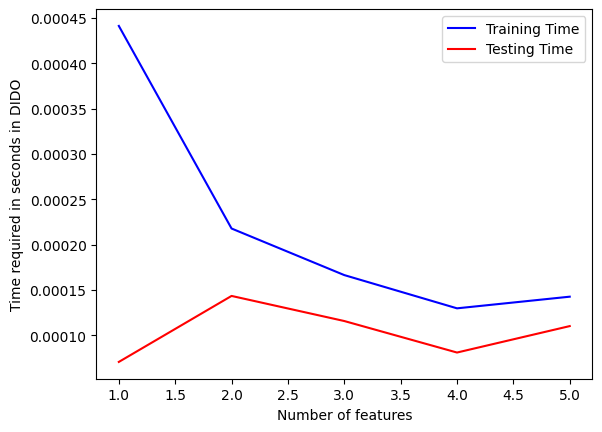

In [105]:
x_plot = np.linspace(1,5,5)
# actual_data = x
plt.plot(x_plot, time_accross_diffno_features, color = "blue", label = "Training Time")
plt.plot(x_plot, time_accross_diffno_features_2, color = "red", label = "Testing Time")
plt.xlabel("Number of features")
plt.ylabel("Time required in seconds in DIDO")
plt.legend()
plt.plot()

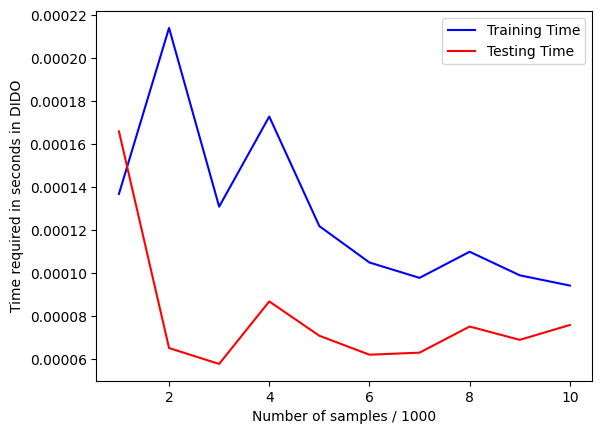

In [49]:
#Now checking how increasing the nunber of instances cause the increase in time of training and tesing.
#This can be done by dividing the dataset into K number of parts, and then keep on increasing the data, by adding these parts

time_row_train = []
time_row_test = []
no_divisions = 10
part_size = N//no_divisions

for a in range(1,no_divisions+1):
    index_end = part_size*a
    X_final = X[:index_end]
    y_final = y[:index_end]
    # Training the model
    X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.3, random_state=42)

    X_train = X_train.reset_index(drop=True)
    y_train = pd.Series(y_train).reset_index(drop = True)

    start_time = time.time()
    clf = DecisionTree(criterion="information_gain")
    clf.fit(X_train, y_train)
    end_time = time.time()
    time_row_train.append(end_time - start_time)

    # Testing the model
    start_time = time.time()
    y_pred = clf.predict(X_test)
    end_time = time.time()
    time_row_test.append(end_time - start_time)

x_plot = np.linspace(1,no_divisions,no_divisions)
plt.plot(x_plot, time_row_train, color = "blue", label = "Training Time")
plt.plot(x_plot, time_row_test, color = "red", label = "Testing Time")
plt.xlabel("Number of samples / 1000")
plt.ylabel("Time required in seconds in DIDO")
plt.legend()
plt.show()

Testing for the case of Real input Discrete output.

In [50]:
# #Doing analysis for the case of RIDO
# from sklearn.datasets import load_iris
# #Loading the iris dataset

# iris = load_iris()
# X = pd.DataFrame(iris.data)
# y = pd.DataFrame(iris.target)
# print(type(X), type(y))
# print(shape(X))

X = pd.DataFrame(np.random.randn(500, 4))
y = pd.Series(np.random.randint(0, 2, 500))

In [51]:
#testing, how increasing the number of columns effect the effieciency.

time_accross_diffno_features = []
time_accross_diffno_features_2 = []


time_single_col_train = []
time_single_col_test = []
#testing for single value
for value in X.columns:
    X_final = X[[value]]

    # Step 2: Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

    X_train = pd.DataFrame(X_train).reset_index(drop = True)
    y_train = pd.Series(y_train).reset_index(drop = True)

    #here we train the data
    start_time = time.time()
    clf = DecisionTree(criterion="information_gain")
    clf.fit(X_train, y_train)
    end_time = time.time()
    time_single_col_train.append(end_time-start_time)
    start_time = time.time()
    y_pred = clf.predict(X_test)
    end_time = time.time()
    time_single_col_test.append(end_time-start_time)

print(f"Time requried to train when only one feature {np.average(time_single_col_train)}")
print(f"Time requried to test when only one feature {np.average(time_single_col_test)}")

time_accross_diffno_features.append(np.average(time_single_col_train))
time_accross_diffno_features_2.append(np.average(time_single_col_test))


Time requried to train when only one feature 8.440017700195312e-05
Time requried to test when only one feature 6.985664367675781e-05


In [52]:
time_second_col_train = []
time_second_col_test = []
#Time for training on two features
for i in range(len(X.columns)):
    for j in range(i + 1, len(X.columns)):
        X_final = X[[X.columns[i], X.columns[j]]]

        X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

        y_train = pd.Series(y_train).reset_index(drop = True)

        #here we train the data
        start_time = time.time()
        clf = DecisionTree(criterion="information_gain")
        clf.fit(X_train, y_train)
        end_time = time.time()
        time_single_col_train.append(end_time-start_time)
        start_time = time.time()
        y_pred = clf.predict(X_test)
        end_time = time.time()
        time_single_col_test.append(end_time-start_time)

print(f"Time requried to train when two features {np.average(time_single_col_train)}")
print(f"Time requried to test when two features {np.average(time_single_col_test)}")

time_accross_diffno_features.append(np.average(time_single_col_train))
time_accross_diffno_features_2.append(np.average(time_single_col_test))

Time requried to train when two features 9.140968322753906e-05
Time requried to test when two features 8.14676284790039e-05


In [53]:
time_three_col_train = []
time_three_col_test = []
for i in range(len(X.columns)):
    for j in range(i + 1, len(X.columns)):
        for k in range(j + 1, len(X.columns)):
            X_final = X[[X.columns[i], X.columns[j], X.columns[k]]]
            X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

            y_train = pd.Series(y_train).reset_index(drop = True)

            #here we train the data
            start_time = time.time()
            clf = DecisionTree(criterion="information_gain")
            clf.fit(X_train, y_train)
            end_time = time.time()
            time_single_col_train.append(end_time-start_time)
            start_time = time.time()
            y_pred = clf.predict(X_test)
            end_time = time.time()
            time_single_col_test.append(end_time-start_time)

print(f"Time requried to train when three features {np.average(time_single_col_train)}")
print(f"Time requried to test when three features {np.average(time_single_col_test)}")

time_accross_diffno_features.append(np.average(time_single_col_train))
time_accross_diffno_features_2.append(np.average(time_single_col_test))

Time requried to train when three features 9.850093296595983e-05
Time requried to test when three features 7.660048348563058e-05


In [54]:
time_five_col_train = []
time_five_col_test = []

X_final = X
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

y_train = pd.Series(y_train).reset_index(drop = True)

# Training the model
start_time = time.time()
clf = DecisionTree(criterion="information_gain")
clf.fit(X_train, y_train)
end_time = time.time()
time_four_col_train.append(end_time - start_time)

# Testing the model
start_time = time.time()
y_pred = clf.predict(X_test)
end_time = time.time()
time_four_col_test.append(end_time - start_time)

print(f"Time required to train when four features: {np.average(time_four_col_train)}")
print(f"Time required to test when four features: {np.average(time_four_col_test)}")

time_accross_diffno_features.append(np.average(time_four_col_train))
time_accross_diffno_features_2.append(np.average(time_four_col_test))


Time required to train when four features: 0.00018603461129324778
Time required to test when four features: 9.897777012416295e-05


[]

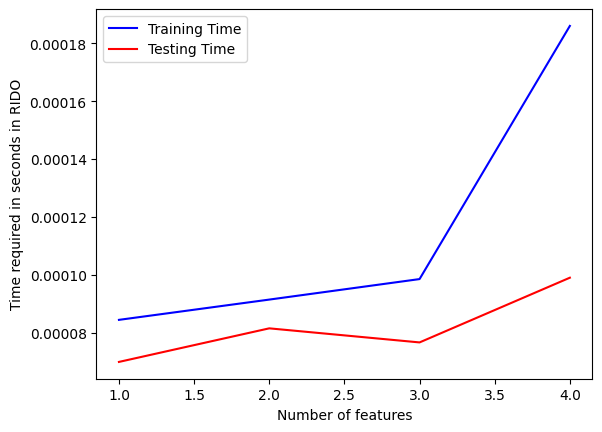

In [55]:
x_plot = np.linspace(1,4,4)
plt.plot(x_plot, time_accross_diffno_features, color = "blue", label = "Training Time")
plt.plot(x_plot, time_accross_diffno_features_2, color = "red", label = "Testing Time")
plt.xlabel("Number of features")
plt.ylabel("Time required in seconds in RIDO")
plt.legend()
plt.plot()

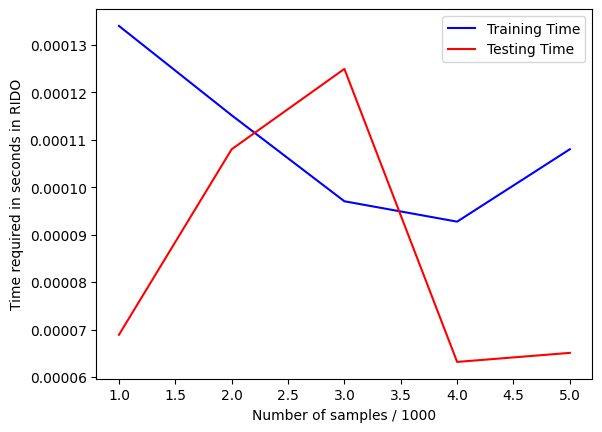

In [56]:
#Now checking how increasing the nunber of instances cause the increase in time of training and tesing.
#This can be done by dividing the dataset into K number of parts, and then keep on increasing the data, by adding these parts

time_row_train = []
time_row_test = []
no_divisions = 5
part_size = N//no_divisions

for a in range(1,no_divisions+1):
    index_end = part_size*a
    X_final = X[:index_end]
    y_final = y[:index_end]
    # Training the model
    X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.3, random_state=42)

    X_train = pd.DataFrame(X_train)
    y_train = pd.Series(y_train).reset_index(drop = True)

    start_time = time.time()
    clf = DecisionTree(criterion="information_gain")
    clf.fit(X_train, y_train)
    end_time = time.time()
    time_row_train.append(end_time - start_time)

    # Testing the model
    start_time = time.time()
    y_pred = clf.predict(X_test)
    end_time = time.time()
    time_row_test.append(end_time - start_time)

x_plot = np.linspace(1,no_divisions,no_divisions)
plt.plot(x_plot, time_row_train, color = "blue", label = "Training Time")
plt.plot(x_plot, time_row_test, color = "red", label = "Testing Time")
plt.xlabel("Number of samples / 1000")
plt.ylabel("Time required in seconds in RIDO")
plt.legend()
plt.show()

Case of Real Input and Real output.

In [83]:
X = pd.DataFrame(np.random.randn(1000, 8))
y = pd.Series(np.random.randn(1000))


In [84]:
#testing, how increasing the number of columns effect the effieciency.

time_accross_diffno_features = []
time_accross_diffno_features_2 = []


time_single_col_train = []
time_single_col_test = []
#testing for single value
for value in X.columns:
    X_final = X[[value]]

    # Step 2: Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

    y_train = pd.Series(y_train[0]).reset_index(drop=True)
    # X_train = pd.DataFrame(X_train)
    X_train = X_train.reset_index(drop=True)
    # y_train = y_train.reset_index(drop=True)

    # print(X_train)
    # print(y_train)


    #here we train the data
    start_time = time.time()
    clf = DecisionTree(criterion="information_gain")
    clf.fit(X_train, y_train)
    end_time = time.time()
    time_single_col_train.append(end_time-start_time)
    start_time = time.time()
    y_pred = clf.predict(X_test)
    end_time = time.time()
    time_single_col_test.append(end_time-start_time)

print(f"Time requried to train when only one feature {np.average(time_single_col_train)}")
print(f"Time requried to test when only one feature {np.average(time_single_col_test)}")

time_accross_diffno_features.append(np.average(time_single_col_train))
time_accross_diffno_features_2.append(np.average(time_single_col_test))


Time requried to train when only one feature 0.00012043118476867676
Time requried to test when only one feature 9.676814079284668e-05


In [85]:
time_second_col_train = []
time_second_col_test = []
#Time for training on two features
for i in range(len(X.columns)):
    for j in range(i + 1, len(X.columns)):
        X_final = X[[X.columns[i], X.columns[j]]]

        X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

        X_train = X_train.reset_index(drop=True)
        y_train = pd.Series(y_train[0]).reset_index(drop=True)

        #here we train the data
        start_time = time.time()
        clf = DecisionTree(criterion="information_gain")
        clf.fit(X_train, y_train)
        end_time = time.time()
        time_single_col_train.append(end_time-start_time)
        start_time = time.time()
        y_pred = clf.predict(X_test)
        end_time = time.time()
        time_single_col_test.append(end_time-start_time)

print(f"Time requried to train when two features {np.average(time_single_col_train)}")
print(f"Time requried to test when two features {np.average(time_single_col_test)}")

time_accross_diffno_features.append(np.average(time_single_col_train))
time_accross_diffno_features_2.append(np.average(time_single_col_test))

Time requried to train when two features 0.0001041359371609158
Time requried to test when two features 9.097655614217122e-05


In [86]:
time_three_col_train = []
time_three_col_test = []
for i in range(len(X.columns)):
    for j in range(i + 1, len(X.columns)):
        for k in range(j + 1, len(X.columns)):
            X_final = X[[X.columns[i], X.columns[j], X.columns[k]]]
            X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

            X_train = X_train.reset_index(drop=True)
            y_train = pd.Series(y_train[0]).reset_index(drop=True)

            #here we train the data
            start_time = time.time()
            clf = DecisionTree(criterion="information_gain")
            clf.fit(X_train, y_train)
            end_time = time.time()
            time_single_col_train.append(end_time-start_time)
            start_time = time.time()
            y_pred = clf.predict(X_test)
            end_time = time.time()
            time_single_col_test.append(end_time-start_time)

print(f"Time requried to train when three features {np.average(time_single_col_train)}")
print(f"Time requried to test when three features {np.average(time_single_col_test)}")

time_accross_diffno_features.append(np.average(time_single_col_train))
time_accross_diffno_features_2.append(np.average(time_single_col_test))

Time requried to train when three features 0.00011716977409694506
Time requried to test when three features 9.279924890269403e-05


In [87]:
time_four_col_train = []
time_four_col_test = []

for i in range(len(X.columns)):
    for j in range(i + 1, len(X.columns)):
        for k in range(j + 1, len(X.columns)):
            for l in range(k + 1, len(X.columns)):
                try:
                    X_final = X[[X.columns[i], X.columns[j], X.columns[k], X.columns[l]]]
                    X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

                    X_train = X_train.reset_index(drop=True)
                    y_train = pd.Series(y_train[0]).reset_index(drop=True)

                    # Training the model
                    start_time = time.time()
                    clf = DecisionTree(criterion="information_gain")
                    clf.fit(X_train, y_train)
                    end_time = time.time()
                    time_four_col_train.append(end_time - start_time)

                    # Testing the model
                    start_time = time.time()
                    y_pred = clf.predict(X_test)
                    end_time = time.time()
                    time_four_col_test.append(end_time - start_time)
                except:
                    pass

print(f"Time required to train when four features: {np.average(time_four_col_train)}")
print(f"Time required to test when four features: {np.average(time_four_col_test)}")

time_accross_diffno_features.append(np.average(time_four_col_train))
time_accross_diffno_features_2.append(np.average(time_four_col_test))

Time required to train when four features: 0.00013126986367361886
Time required to test when four features: 9.463514600481306e-05


In [88]:
time_four_col_train = []
time_four_col_test = []

for i in range(len(X.columns)):
    for j in range(i + 1, len(X.columns)):
        for k in range(j + 1, len(X.columns)):
            X_final = X.drop(columns=[X.columns[i], X.columns[j], X.columns[k]])
            try:

                X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

                X_train = X_train.reset_index(drop=True)
                y_train = pd.Series(y_train[0]).reset_index(drop=True)

                # Training the model
                start_time = time.time()
                clf = DecisionTree(criterion="information_gain")
                clf.fit(X_train, y_train)
                end_time = time.time()
                time_four_col_train.append(end_time - start_time)

                # Testing the model
                start_time = time.time()
                y_pred = clf.predict(X_test)
                end_time = time.time()
                time_four_col_test.append(end_time - start_time)
            except:
                pass

print(f"Time required to train when five features: {np.average(time_four_col_train)}")
print(f"Time required to test when five features: {np.average(time_four_col_test)}")

time_accross_diffno_features.append(np.average(time_four_col_train))
time_accross_diffno_features_2.append(np.average(time_four_col_test))


Time required to train when five features: 0.00014945438929966519
Time required to test when five features: 9.491613933018275e-05


In [89]:
time_four_col_train = []
time_four_col_test = []

for i in range(len(X.columns)):
    for j in range(i + 1, len(X.columns)):
        # Drop the selected two columns
        X_final = X.drop(columns=[X.columns[i], X.columns[j]])

        X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

        X_train = X_train.reset_index(drop=True)
        y_train = pd.Series(y_train[0]).reset_index(drop=True)

        # Training the model
        start_time = time.time()
        clf = DecisionTree(criterion="information_gain")
        clf.fit(X_train, y_train)
        end_time = time.time()
        time_four_col_train.append(end_time - start_time)

        # Testing the model
        start_time = time.time()
        y_pred = clf.predict(X_test)
        end_time = time.time()
        time_four_col_test.append(end_time - start_time)

print(f"Time required to train when sixth features: {np.average(time_four_col_train)}")
print(f"Time required to test when sixth features: {np.average(time_four_col_test)}")

time_accross_diffno_features.append(np.average(time_four_col_train))
time_accross_diffno_features_2.append(np.average(time_four_col_test))


Time required to train when sixth features: 0.00018280744552612305
Time required to test when sixth features: 0.00010117462703159877


In [90]:
time_four_col_train = []
time_four_col_test = []

for i in range(len(X.columns)):
    # Drop the selected column
    X_final = X.drop(columns=[X.columns[i]])

    X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

    X_train = X_train.reset_index(drop=True)
    y_train = pd.Series(y_train[0]).reset_index(drop = True)
    # Training the model
    start_time = time.time()
    clf = DecisionTree(criterion="information_gain")
    clf.fit(X_train, y_train)
    end_time = time.time()
    time_four_col_train.append(end_time - start_time)

    # Testing the model
    start_time = time.time()
    y_pred = clf.predict(X_test)
    end_time = time.time()
    time_four_col_test.append(end_time - start_time)

print(f"Time required to train when seventh features: {np.average(time_four_col_train)}")
print(f"Time required to test when seventh features: {np.average(time_four_col_test)}")

time_accross_diffno_features.append(np.average(time_four_col_train))
time_accross_diffno_features_2.append(np.average(time_four_col_test))


Time required to train when seventh features: 0.00017014145851135254
Time required to test when seventh features: 8.96751880645752e-05


In [91]:
time_five_col_train = []
time_five_col_test = []

X_final = X
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

X_train = X_train.reset_index(drop=True)
y_train = pd.Series(y_train[0]).reset_index(drop = True)

# Training the model
start_time = time.time()
clf = DecisionTree(criterion="information_gain")
clf.fit(X_train, y_train)
end_time = time.time()
time_four_col_train.append(end_time - start_time)

# Testing the model
start_time = time.time()
y_pred = clf.predict(X_test)
end_time = time.time()
time_four_col_test.append(end_time - start_time)

print(f"Time required to train when eighth features: {np.average(time_four_col_train)}")
print(f"Time required to test when eighth features: {np.average(time_four_col_test)}")

time_accross_diffno_features.append(np.average(time_four_col_train))
time_accross_diffno_features_2.append(np.average(time_four_col_test))


Time required to train when eighth features: 0.0001853571997748481
Time required to test when eighth features: 9.481112162272136e-05


[]

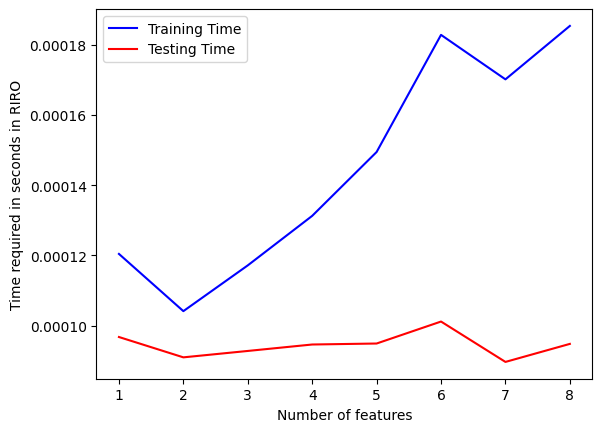

In [92]:
x_plot = np.linspace(1,8,8)

plt.plot(x_plot, time_accross_diffno_features, color = "blue", label = "Training Time")
plt.plot(x_plot, time_accross_diffno_features_2, color = "red", label = "Testing Time")
plt.xlabel("Number of features")
plt.ylabel("Time required in seconds in RIRO")
plt.legend()
plt.plot()


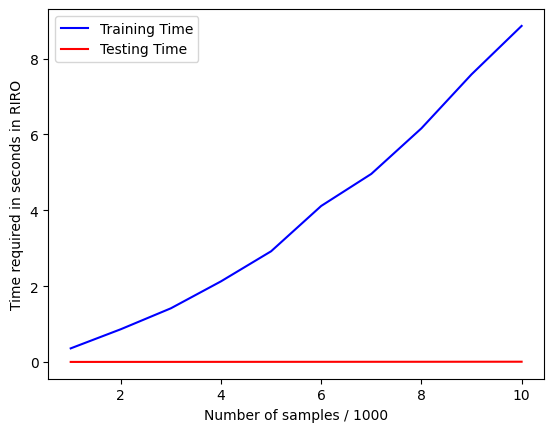

In [93]:
#Now checking how increasing the nunber of instances cause the increase in time of training and tesing.
#This can be done by dividing the dataset into K number of parts, and then keep on increasing the data, by adding these parts

time_row_train = []
time_row_test = []
no_divisions = 10
part_size = N//no_divisions

for a in range(1,no_divisions+1):
    index_end = part_size*a
    X_final = X[:index_end]
    y_final = y[:index_end]
    # Training the model
    X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.3, random_state=42)

    X_train = X_train.reset_index(drop=True)
    y_train = pd.Series(y_train).reset_index(drop = True)

    start_time = time.time()
    clf = DecisionTree(criterion="information_gain")
    clf.fit(X_train, y_train)
    end_time = time.time()
    time_row_train.append(end_time - start_time)

    # Testing the model
    start_time = time.time()
    y_pred = clf.predict(X_test)
    end_time = time.time()
    time_row_test.append(end_time - start_time)

x_plot = np.linspace(1,no_divisions,no_divisions)
plt.plot(x_plot, time_row_train, color = "blue", label = "Training Time")
plt.plot(x_plot, time_row_test, color = "red", label = "Testing Time")
plt.xlabel("Number of samples / 1000")
plt.ylabel("Time required in seconds in RIRO")
plt.legend()
plt.show()

Discrete input, Real output

In [ ]:
X = pd.DataFrame(np.random.randint(0, 2, (1000,4)))
y = pd.Series(np.random.randn(1000))


In [ ]:
#testing, how increasing the number of columns effect the effieciency.

time_accross_diffno_features = []
time_accross_diffno_features_2 = []


time_single_col_train = []
time_single_col_test = []
#testing for single value
for value in X.columns:
    X_final = X[[value]]

    # Step 2: Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

    y_train = pd.Series(y_train)

    #here we train the data
    start_time = time.time()
    clf = DecisionTree(criterion="information_gain")
    clf.fit(X_train, y_train)
    end_time = time.time()
    time_single_col_train.append(end_time-start_time)
    start_time = time.time()
    y_pred = clf.predict(X_test)
    end_time = time.time()
    time_single_col_test.append(end_time-start_time)

print(f"Time requried to train when only one feature {np.average(time_single_col_train)}")
print(f"Time requried to test when only one feature {np.average(time_single_col_test)}")

time_accross_diffno_features.append(np.average(time_single_col_train))
time_accross_diffno_features_2.append(np.average(time_single_col_test))


One hot encoding the features!
discrete real
One hot encoding the features!
discrete real
One hot encoding the features!
discrete real
One hot encoding the features!
discrete real
Time requried to train when only one feature 0.004162251949310303
Time requried to test when only one feature 0.0013709664344787598


In [ ]:
time_second_col_train = []
time_second_col_test = []
# Time for training on two features
for i in range(len(X.columns)):
    for j in range(i + 1, len(X.columns)):
        X_final = X[[X.columns[i], X.columns[j]]]
        X_train, X_test, y_train, y_test = train_test_split(
            X_final, y, test_size=0.3, random_state=42)

        X_train = X_train.reset_index(drop=True)
        y_train = pd.Series(y_train).reset_index(drop= True)

        # here we train the data
        start_time = time.time()
        clf = DecisionTree(criterion="information_gain", max_depth=5)
        clf.fit(X_train, y_train)
        end_time = time.time()
        time_single_col_train.append(end_time-start_time)
        start_time = time.time()
        y_pred = clf.predict(X_test)
        end_time = time.time()
        time_single_col_test.append(end_time-start_time)

print(f"Time requried to train when two features {
      np.average(time_single_col_train)}")
print(f"Time requried to test when two features {
      np.average(time_single_col_test)}")

time_accross_diffno_features.append(np.average(time_single_col_train))
time_accross_diffno_features_2.append(np.average(time_single_col_test))

One hot encoding the features!
discrete real
One hot encoding the features!
discrete real
One hot encoding the features!
discrete real
One hot encoding the features!
discrete real
One hot encoding the features!
discrete real
One hot encoding the features!
discrete real
Time requried to train when two features 0.006681609153747559
Time requried to test when two features 0.0013119697570800782


In [ ]:
time_three_col_train = []
time_three_col_test = []
for i in range(len(X.columns)):
    for j in range(i + 1, len(X.columns)):
        for k in range(j + 1, len(X.columns)):
            X_final = X[[X.columns[i], X.columns[j], X.columns[k]]]
            X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

            X_train = X_train.reset_index(drop=True)
            y_train = pd.Series(y_train).reset_index(drop=True)

            #here we train the data
            start_time = time.time()
            clf = DecisionTree(criterion="information_gain")
            clf.fit(X_train, y_train)
            end_time = time.time()
            time_single_col_train.append(end_time-start_time)
            start_time = time.time()
            y_pred = clf.predict(X_test)
            end_time = time.time()
            time_single_col_test.append(end_time-start_time)

print(f"Time requried to train when three features {np.average(time_single_col_train)}")
print(f"Time requried to test when three features {np.average(time_single_col_test)}")

time_accross_diffno_features.append(np.average(time_single_col_train))
time_accross_diffno_features_2.append(np.average(time_single_col_test))

One hot encoding the features!
discrete real
One hot encoding the features!
discrete real
One hot encoding the features!
discrete real
One hot encoding the features!
discrete real
Time requried to train when three features 0.009736810411725725
Time requried to test when three features 0.0013025828770228795


In [ ]:
time_four_col_train = []
time_four_col_test = []

X_final = X
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

y_train = pd.Series(y_train[0])

# Training the model
start_time = time.time()
clf = DecisionTree(criterion="information_gain")
clf.fit(X_train, y_train)
end_time = time.time()
time_four_col_train.append(end_time - start_time)

# Testing the model
start_time = time.time()
y_pred = clf.predict(X_test)
end_time = time.time()
time_four_col_test.append(end_time - start_time)

print(f"Time required to train when four features: {np.average(time_four_col_train)}")
print(f"Time required to test when four features: {np.average(time_four_col_test)}")

time_accross_diffno_features.append(np.average(time_four_col_train))
time_accross_diffno_features_2.append(np.average(time_four_col_test))


One hot encoding the features!
discrete real
Time required to train when four features: 0.0028069019317626953
Time required to test when four features: 0.0001342296600341797


[]

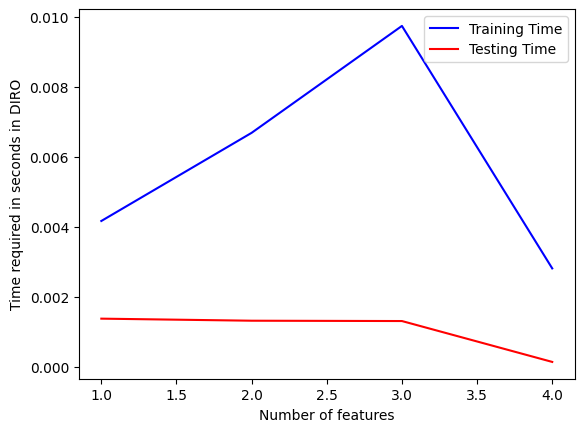

In [ ]:
x_plot = np.linspace(1,4,4)
plt.plot(x_plot, time_accross_diffno_features, color = "blue", label = "Training Time")
plt.plot(x_plot, time_accross_diffno_features_2, color = "red", label = "Testing Time")
plt.xlabel("Number of features")
plt.ylabel("Time required in seconds in DIRO")
plt.legend()
plt.plot()

One hot encoding the features!
discrete real
One hot encoding the features!
discrete real
One hot encoding the features!
discrete real
One hot encoding the features!
discrete real
One hot encoding the features!
discrete real
One hot encoding the features!
discrete real
One hot encoding the features!
discrete real
One hot encoding the features!
discrete real
One hot encoding the features!
discrete real
One hot encoding the features!
discrete real


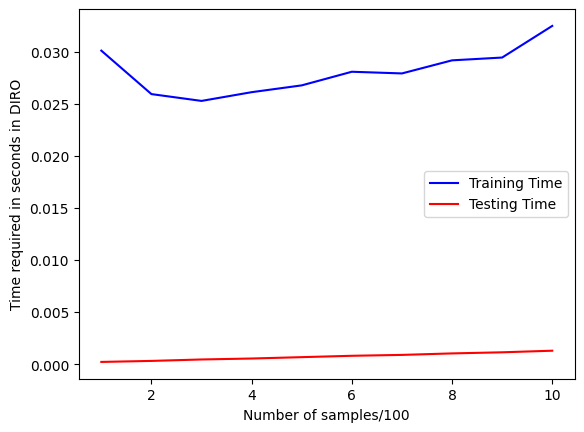

In [ ]:
time_row_train = []
time_row_test = []
no_divisions = 10
part_size = N//no_divisions

for a in range(1,no_divisions+1):
    index_end = part_size*a
    X_final = X[:index_end]
    y_final = y[:index_end]
    # Training the model
    X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.3, random_state=42)

    X_train = X_train.reset_index(drop=True)
    y_train = pd.Series(y_train).reset_index(drop = True)

    start_time = time.time()
    clf = DecisionTree(criterion="information_gain")
    clf.fit(X_train, y_train)
    end_time = time.time()
    time_row_train.append(end_time - start_time)

    # Testing the model
    start_time = time.time()
    y_pred = clf.predict(X_test)
    end_time = time.time()
    time_row_test.append(end_time - start_time)

x_plot = np.linspace(1,no_divisions,no_divisions)
plt.plot(x_plot, time_row_train, color = "blue", label = "Training Time")
plt.plot(x_plot, time_row_test, color = "red", label = "Testing Time")
plt.xlabel("Number of samples/100")
plt.ylabel("Time required in seconds in DIRO")
plt.legend()
plt.show()

Plotting the graph of nlog(n)

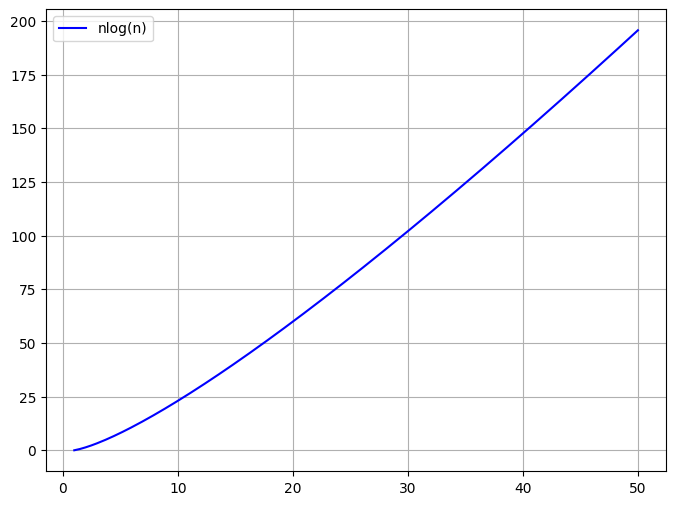

In [ ]:

n = np.linspace(1, 50, 200)
y = n * np.log(n)

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(n, y, label='nlog(n)', color='blue')
plt.legend()
plt.grid(True)
plt.show()

Theoretically, the decision trees are coded using recursions, and hence the big O is O(N M log(N)), where M is the number of samples and M is the number of features.

In all the cases except DIDO, the time required to train decision tree, does increase in correspondence to the time complexity mentioned above and illustrated in the graph.

In cases of DIDO, the output is not as predicted, as is decreasing instead of rising for less number of features, and then taking upturn.
This anomality can be stated to the conditions, where the algorithm of the decision tree increases the depth of the tree, and also, the number of splits happening can be different, with different number of features. The data generated in these cases are also random, and do not show any kind of relation with the output which is actually expected by the model, and in these cases, the depth might vary highly leading to unexpected time requirement.

The time required for training the model is not consistent with the predicted graph. This can be cited again to the randomness of the data we have generated.
As, wre increase the number of samples, it might happen, that they require more number of splits, and the graphs becomes deeper and deeper.